<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **45 to 60** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
#!pip install pandas
#!pip install matplotlib

Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [4]:
#from pyodide.http import pyfetch

#async def download(url, filename):
#    response = await pyfetch(url)
#    if response.status == 200:
#        with open(filename, "wb") as f:
#            f.write(await response.bytes())

# Define the file path for the data
#file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Download the dataset
#await download(file_path, "survey_data.csv")
#file_name = "survey_data.csv"


Load the data into a pandas dataframe:



In [5]:
#df = pd.read_csv(file_name)


Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [6]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


In [7]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [11]:
# Drop the 'ResponseId' column if it exists
df = df.drop(columns=['ResponseId'], errors='ignore')

## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [23]:
# Count the number of duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Display the first few duplicate rows to understand their structure
duplicate_rows = df[df.duplicated()]
print("First few duplicate rows:")
duplicate_rows.head()

Number of duplicate rows: 487
First few duplicate rows:


,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
46264,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46774,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Professional development or self-paced l...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46921,I am a developer by profession,18-24 years old,"Employed, full-time",In-person,Apples,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47073,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time",In-person,Apples,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47340,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Task 2: Analyze Characteristics of Duplicates
1. Identify which columns have the same values in duplicate rows.
2. Analyze the distribution of duplicates across different columns such as Country, Employment, and DevType.


In [31]:
# Identify which columns have the same values in duplicate rows
same_value_columns = df.columns[(df.loc[duplicate_rows.index].nunique() == 1).values]
print("Columns with the same values in duplicate rows:")
print(same_value_columns)

Columns with the same values in duplicate rows:
Index(['Check', 'SOVisitFreq', 'SOAccount', 'AISent'], dtype='object')


In [32]:
duplicate_rows["Check"].value_counts()

Check
Apples    487
Name: count, dtype: int64

In [29]:
duplicate_rows["Country"].value_counts()

Series([], Name: count, dtype: int64)

In [28]:
duplicate_rows["Employment"].value_counts()

Employment
Employed, full-time                                                         361
Student, full-time                                                           56
Independent contractor, freelancer, or self-employed                         22
Not employed, but looking for work                                           11
Employed, full-time;Independent contractor, freelancer, or self-employed      8
I prefer not to say                                                           8
Employed, full-time;Student, full-time                                        5
Student, part-time                                                            4
Student, full-time;Not employed, but looking for work                         3
Not employed, and not looking for work                                        3
Student, full-time;Employed, part-time                                        3
Employed, part-time                                                           2
Student, full-time;Independen

In [30]:
duplicate_rows["DevType"].value_counts()

Series([], Name: count, dtype: int64)

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


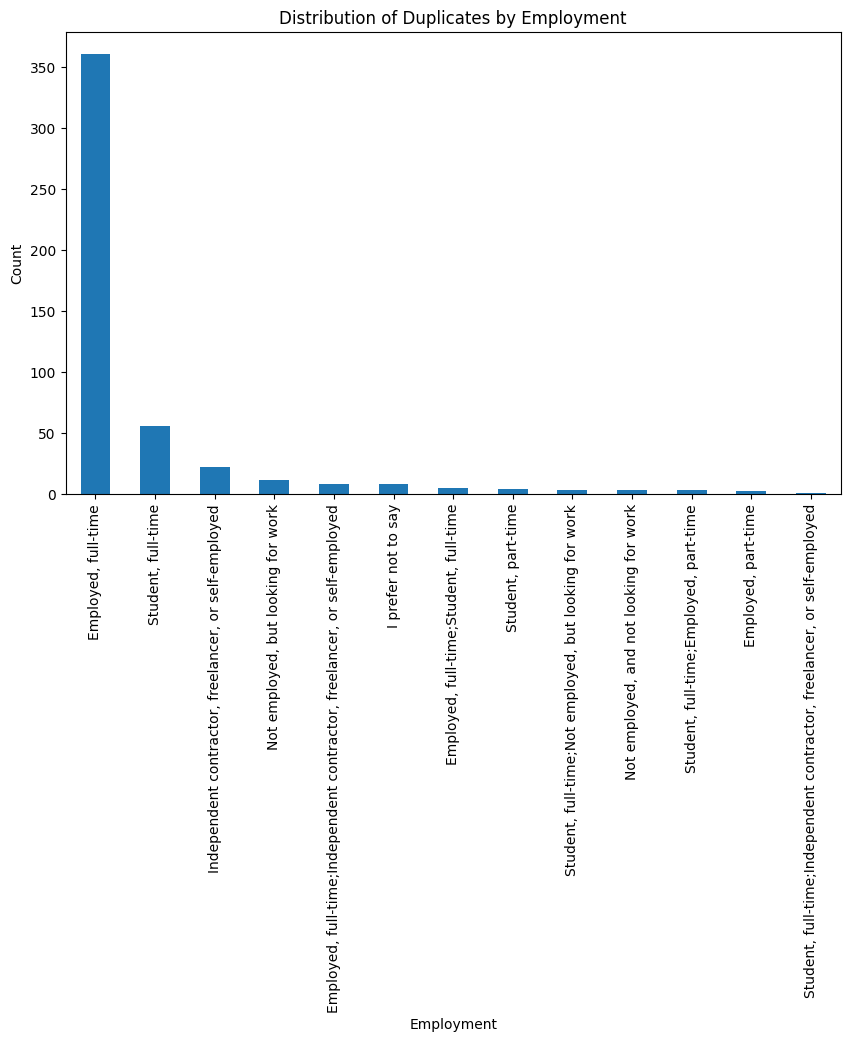

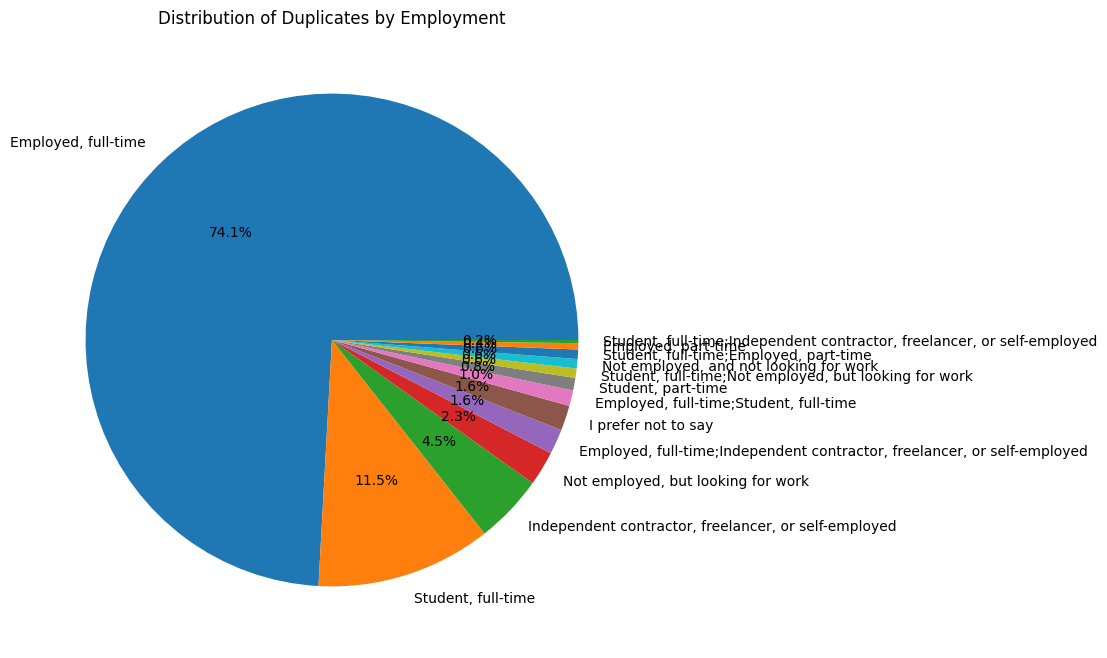

In [34]:

# Create visualizations for the distribution of duplicates
distribution = duplicate_rows['Employment'].value_counts() 
# Bar chart
plt.figure(figsize=(10, 6))
distribution.plot(kind='bar', title=f"Distribution of Duplicates by Employment")
plt.xlabel('Employment')
plt.ylabel("Count")
plt.show()        
# Pie chart
plt.figure(figsize=(8, 8))
distribution.plot(kind='pie', autopct='%1.1f%%', title=f"Distribution of Duplicates by Employment")
plt.ylabel("")  # Hide the y-label for better aesthetics
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [39]:
print(list(df.columns))

['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackA

In [40]:
# Subset of columns to define uniqueness
critical_columns = ['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'Country', 'Currency']  # Replace with your chosen columns

# Find duplicate rows based on the subset
duplicates = df[df.duplicated(subset=critical_columns, keep=False)]
print(f"Total duplicates found: {len(duplicates)}")

Total duplicates found: 34540


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>
